In [5]:
library(dplyr)
library(Seurat)
#library(umap)
#library(FactoMineR)
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(patchwork))
#suppressPackageStartupMessages(library(refGenome))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(future))
suppressPackageStartupMessages(library(ggrepel))
#suppressPackageStartupMessages(library(WGCNA))
suppressPackageStartupMessages(library(lsa))
suppressPackageStartupMessages(library(ComplexHeatmap))
suppressPackageStartupMessages(library(circlize))
suppressPackageStartupMessages(library(stringr))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


rgeos version: 0.6-3, (SVN revision 696)
 GEOS runtime version: 3.11.2-CAPI-1.17.2 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 1.6-1 
 Polygon checking: TRUE 




# Cell type annotation

In [11]:
# df6<-readRDS("/projects/ps-gleesonlab7/User/chchung/4_interneuron/2022-09-09_10XGE_pilot/Ctrl8553.rds")
# df7<-readRDS("/projects/ps-gleesonlab7/User/chchung/4_interneuron/2022-09-09_10XGE_pilot/Ctrl8718.rds")
# df8 <- readRDS("/projects/ps-gleesonlab7/User/chchung/3_FCD_project1/2021-10-26_FCD_snRNAseq/2021-10-29_20211026_FCD_snRNAseq_CTRL83538352_demuxlet_4556nu.rds")
# df8<-readRDS("/projects/ps-gleesonlab8/Uniformly_processed_data/20230609_Changuk_Interneuron_10XGE_IGM/TBR1.rds")
# countsData1<-read.delim(file = "/projects/ps-gleesonlab8/User/chchung/DRG/20230616_bioskryb_interneuron_plate1_Changuk.csv", header = TRUE, sep = ",",row.names = 1)
# countsData2<-read.delim(file = "/projects/ps-gleesonlab8/User/chchung/DRG/20230616_bioskryb_interneuron_plate2_Changuk.csv", header = TRUE, sep = ",",row.names = 1)
# countsData3<-read.delim(file = "/projects/ps-gleesonlab8/rawUser/chchung/DRG/20230616_bioskryb_interneuron_plate3_Changuk.csv", header = TRUE, sep = ",",row.names = 1)
countsData4<-read.delim(file = "/projects/ps-gleesonlab8/User/chchung/DRG/20230708_bioskryb_interneuron_plate1_1_Changuk_rawcount.csv", header = TRUE, sep = ",",row.names = 1)
countsData5<-read.delim(file = "/projects/ps-gleesonlab8/User/chchung/DRG/20230708_bioskryb_interneuron_plate1_2_23_Changuk_rowcount.csv", header = TRUE, sep = ",",row.names = 1)
countsData6<-read.delim(file = "/projects/ps-gleesonlab8/User/chchung/Interneuron/20221223_7669_Ampliseq_QC/Bioskryb/SMARTseq/trimmed_means.csv", header = TRUE, sep = ",",row.names = 1)


In [12]:
head(countsData6)

,Exc.L5.6.FEZF2.ANKRD20A1,Exc.L5.6.THEMIS.TMEM233,Inh.L1.LAMP5.NDNF,Exc.L6.FEZF2.CPZ,Astro.L1.FGFR3.MT1G,Exc.L2.3.LINC00507.RPL9P17,Exc.L6.FEZF2.KRT17,Exc.L3.4.RORB.FOLH1B,Endo.L2.5.CLDN5,Exc.L5.6.RORB.LINC00320,⋯,Exc.L4.RORB.CACNG5,Exc.L6.FEZF2.FAM95C,Inh.L1.3.VIP.GGH,Exc.L3.5.FEZF2.DCN,Exc.L6.FEZF2.ETV4,Exc.L5.6.FEZF2.RSAD2,Inh.L1.ADARB2.DISP2,Inh.L5.6.LAMP5.SFTA3,Exc.L6.FEZF2.TBC1D26,Inh.L4.5.PVALB.TRIM67
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.8-1.2,0.0000000,0.0000000,0.0000000000,0.0000000,0,0.0000000,0.0000000,0.000000,0,0.0000000,⋯,0,0.0000000,0,0.00000000,0.000000,0,0,0.00000000,0.000000,0
3.8-1.3,0.0000000,0.0000000,0.0000000000,0.0000000,0,0.0000000,0.0000000,0.000000,0,0.0000000,⋯,0,0.0000000,0,0.00000000,0.000000,0,0,0.00000000,0.000000,0
3.8-1.4,0.0000000,0.0000000,0.0000000000,0.0000000,0,0.0000000,0.0000000,0.000000,0,0.0000000,⋯,0,0.0000000,0,0.00000000,0.000000,0,0,0.00000000,0.000000,0
3.8-1.5,0.0000000,0.0000000,0.0000000000,0.0000000,0,0.0000000,0.0000000,0.000000,0,0.0000000,⋯,0,0.0000000,0,0.00000000,0.000000,0,0,0.00000000,0.000000,0
5-HT3C2,0.0000000,0.0000000,0.0000000000,0.0000000,0,0.0000000,0.0000000,0.000000,0,0.0000000,⋯,0,0.0000000,0,0.00000000,0.000000,0,0,0.00000000,0.000000,0
A1BG,0.3356098,0.7959542,0.0009090909,0.4040158,0,0.3238947,0.7611154,0.255572,0,0.3470149,⋯,0,0.4151348,0,0.09619047,0.209433,0,0,0.01094637,1.092742,0


In [13]:
# rownames(countsData1)<-countsData1$SYMBOL
# countsData1<-countsData1[,!colnames(countsData1) %in% (c("Chr","Start","End","Strand","Length","SYMBOL"))]
# rownames(countsData2)<-countsData2$SYMBOL
# countsData2<-countsData2[,!colnames(countsData2) %in% (c("Chr","Start","End","Strand","Length","SYMBOL"))]
# rownames(countsData3)<-countsData3$SYMBOL
# countsData3<-countsData3[,!colnames(countsData3) %in% (c("Chr","Start","End","Strand","Length","SYMBOL"))]
rownames(countsData4)<-countsData4$SYMBOL
countsData4<-countsData4[,!colnames(countsData4) %in% (c("Chr","Start","End","Strand","Length","SYMBOL"))]
rownames(countsData5)<-countsData5$SYMBOL
countsData5<-countsData5[,!colnames(countsData5) %in% (c("Chr","Start","End","Strand","Length","SYMBOL"))]

In [14]:
# df1 <- CreateSeuratObject(counts =(countsData1), project = "bioskryb_7669_old_F")
# df2 <- CreateSeuratObject(counts =(countsData2), project = "bioskryb_7669_old_T")
# df3 <- CreateSeuratObject(counts =(countsData3), project = "bioskryb_7669_old_HIP")
df4 <- CreateSeuratObject(counts =(countsData4), project = "bioskryb_7669_F1")
df5 <- CreateSeuratObject(counts =(countsData5), project = "bioskryb_7669_F2TH")
df6 <- CreateSeuratObject(counts =(countsData6), project = "ref")

In [15]:
df0 <- merge(df4, y = c(df5,df6), 
             add.cell.ids = c("bioskryb_7669_F1","bioskryb_7669_F2TH","ref"))

In [16]:
merge<-df0

In [17]:
df0<-merge

In [18]:
unique(merge@meta.data$orig.ident)

[1] "X.projects.ps.gleesonlab8.User.arzoo.20230706"
[2] "X.projects.ps.gleesonlab8.User.arzoo.20230727"
[3] "ref"

In [19]:
df0@meta.data[df0@meta.data$orig.ident=="X.projects.ps.gleesonlab8.User.arzoo.20230706",]$orig.ident<-"bioskryb_7669_F1"
df0@meta.data[df0@meta.data$orig.ident=="X.projects.ps.gleesonlab8.User.arzoo.20230727",]$orig.ident<-"bioskryb_7669_F2TH"
df0@meta.data[df0@meta.data$orig.ident=="ref",]$orig.ident<-"ref"

In [20]:
my_string <- rownames(df0@meta.data)
extracted <- str_extract(my_string, "SC\\d{2}")
print(extracted)
df0@meta.data$Cell_ID<-c(extracted)

my_string <- rownames(df0@meta.data[df0@meta.data$orig.ident=="bioskryb_7669_F1",])
my_string2 <- rownames(df0@meta.data[df0@meta.data$orig.ident=="bioskryb_7669_F2TH",])
my_string3 <- rownames(df0@meta.data[df0@meta.data$orig.ident=="ref",])

extracted <- str_extract(my_string, "PL01\\..*?(?=\\.)")
extracted2 <- str_extract(my_string2, "PL0._.*?(?=_)")

  [1] "SC01" "SC02" "SC03" "SC04" "SC05" "SC07" "SC08" "SC09" "SC10" "SC11"
 [11] "SC12" "SC13" "SC14" "SC15" "SC16" "SC17" "SC18" "SC19" "SC20" "SC21"
 [21] "SC22" "SC23" "SC24" "SC25" "SC26" "SC27" "SC28" "SC29" "SC30" "SC31"
 [31] "SC32" "SC33" "SC34" "SC35" "SC36" "SC37" "SC38" "SC39" "SC40" "SC41"
 [41] "SC42" "SC43" "SC44" "SC45" "SC46" "SC47" "SC48" "SC49" "SC50" "SC51"
 [51] "SC53" "SC54" "SC55" "SC56" "SC57" "SC58" "SC59" "SC60" "SC61" "SC62"
 [61] "SC65" "SC67" "SC68" "SC69" "SC70" "SC71" "SC72" "SC73" "SC74" "SC75"
 [71] "SC76" "SC77" "SC78" "SC79" "SC82" "SC86" "SC87" "SC89" "SC90" "SC91"
 [81] "SC92" "SC93" "SC94" "SC96" "SC01" "SC02" "SC03" "SC04" "SC05" "SC06"
 [91] "SC07" "SC08" "SC09" "SC10" "SC11" "SC12" "SC13" "SC14" "SC15" "SC16"
[101] "SC17" "SC18" "SC19" "SC20" "SC21" "SC22" "SC23" "SC24" "SC25" "SC26"
[111] "SC27" "SC28" "SC29" "SC30" "SC31" "SC32" "SC33" "SC34" "SC35" "SC36"
[121] "SC37" "SC38" "SC39" "SC40" "SC41" "SC42" "SC43" "SC44" "SC45" "SC46"
[131] "SC47"

In [21]:
df0@meta.data$Region<-c(extracted, extracted2,my_string3)

In [22]:
unique(df0@meta.data$Region)

[1] "PL01.Frontal"                   "PL01_Frontal"                  
  [3] "PL02_Temporal"                  "PL03_Hippocampus"              
  [5] "ref_Exc.L5.6.FEZF2.ANKRD20A1"   "ref_Exc.L5.6.THEMIS.TMEM233"   
  [7] "ref_Inh.L1.LAMP5.NDNF"          "ref_Exc.L6.FEZF2.CPZ"          
  [9] "ref_Astro.L1.FGFR3.MT1G"        "ref_Exc.L2.3.LINC00507.RPL9P17"
 [11] "ref_Exc.L6.FEZF2.KRT17"         "ref_Exc.L3.4.RORB.FOLH1B"      
 [13] "ref_Endo.L2.5.CLDN5"            "ref_Exc.L5.6.RORB.LINC00320"   
 [15] "ref_Inh.L3.6.PVALB.MFI2"        "ref_Inh.L1.4.VIP.CHRNA2"       
 [17] "ref_Exc.L5.6.FEZF2.CYP26B1"     "ref_Inh.L1.6.PVALB.SCUBE3"     
 [19] "ref_Inh.L5.6.PVALB.STON2"       "ref_Exc.L3.5.RORB.CMAHP"       
 [21] "ref_Inh.L4.6.SST.MTHFD2P6"      "ref_Exc.L3.4.RORB.RPS3P6"      
 [23] "ref_Exc.L6.THEMIS.C6orf48"      "ref_Inh.L1.3.VIP.SSTR1"        
 [25] "ref_Exc.L3.5.LINC00507.SLN"     "ref_Exc.L4.5.RORB.ASCL1"       
 [27] "ref_Inh.L3.6.VIP.KCTD13"        "ref_Inh.L5.6.SST.KLHL14"       
 [29] "ref_Exc.L4.5.RORB.HNRNPA1P46"   "ref_X"                         
 [31] "ref_Exc.L3.5.THEMIS.UBE2F"      "ref_Inh.L1.3.VIP.ZNF322P1"     
 [33] "ref_Exc.L3.4.RORB.SEMA6D"       "ref_Inh.L1.ADARB2.ADAM33"      
 [35] "ref_VLMC.L1.3.CYP1B1"           "ref_Inh.L1.PAX6.CA4"           
 [37] "ref_Peri.L1.6.MUSTN1"           "ref_Exc.L4.5.RORB.AIM2"        
 [39] "ref_Inh.L1.2.PVALB.TAC1"        "ref_Astro.L1.FGFR3.FOS"        
 [41] "ref_Inh.L1.2.VIP.PPAPDC1A"      "ref_Oligo.L4.6.MOBP.COL18A1"   
 [43] "ref_OPC.L1.6.MYT1"              "ref_Inh.L1.6.VIP.RCN1"         
 [45] "ref_Inh.L5.6.PVALB.FAM150B"     "ref_Inh.L5.6.SST.ISOC1"        
 [47] "ref_Inh.L1.3.PVALB.WFDC2"       "ref_Inh.L6.SST.NPY"            
 [49] "ref_Exc.L4.RORB.BHLHE22"        "ref_Exc.L4.5.RORB.LCN15"       
 [51] "ref_Exc.L5.6.THEMIS.OR1J1"      "ref_Exc.L6.FEZF2.TBCC"         
 [53] "ref_Inh.L3.VIP.CBLN1"           "ref_Micro.L1.6.C1QC"           
 [55] "ref_Exc.L6.FEZF2.P4HA3"         "ref_Exc.L4.6.RORB.HPCA"        
 [57] "ref_Inh.L2.4.SST.AHR"           "ref_Inh.L2.6.VIP.VIP"          
 [59] "ref_Exc.L5.FEZF2.SCN7A"         "ref_Inh.L1.LAMP5.GGT8P"        
 [61] "ref_Exc.L5.6.THEMIS.IL7R"       "ref_Exc.L6.FEZF2.SLITRK6"      
 [63] "ref_Inh.L1.6.LAMP5.CA13"        "ref_Inh.L1.VIP.PCDH20"         
 [65] "ref_Exc.L5.RORB.LINC01202"      "ref_Inh.L1.VIP.TNFAIP8L3"      
 [67] "ref_Inh.L1.6.VIP.PENK"          "ref_Inh.L2.4.VIP.DSEL"         
 [69] "ref_Inh.L1.2.PAX6.SCGN"         "ref_Exc.L3.5.FEZF2.ONECUT1"    
 [71] "ref_Inh.L5.PVALB.CNTNAP3P2"     "ref_Inh.L6.LHX6.GLP1R"         
 [73] "ref_Exc.L6.FEZF2.VWA2"          "ref_Exc.L3.5.RORB.CD24"        
 [75] "ref_Inh.L3.4.PVALB.HOMER3"      "ref_Exc.L5.6.THEMIS.THTPA"     
 [77] "ref_Exc.L5.6.FEZF2.CABP7"       "ref_Exc.L6.THEMIS.EGR3"        
 [79] "ref_Inh.L1.6.VIP.RGS16"         "ref_Exc.L3.5.THEMIS.ELOF1"     
 [81] "ref_Exc.L4.5.RORB.LINC01474"    "ref_Inh.L2.5.VIP.TOX2"         
 [83] "ref_Inh.L1.3.VIP.ACHE"          "ref_Inh.L3.5.SST.MAFB"         
 [85] "ref_Inh.L5.6.SST.TH"            "ref_Exc.L3.LINC00507.CTXN3"    
 [87] "ref_Exc.L5.6.FEZF2.MYBPHL"      "ref_Exc.L4.RORB.CCDC168"       
 [89] "ref_Exc.L3.5.RORB.HSPB3"        "ref_Inh.L1.VIP.SOX11"          
 [91] "ref_Inh.L1.PAX6.GRIP2"          "ref_Exc.L5.FEZF2.MORN2"        
 [93] "ref_Exc.L3.LINC00507.PSRC1"     "ref_Inh.L1.SST.CXCL14"         
 [95] "ref_Exc.L5.FEZF2.DYRK2"         "ref_Exc.L3.4.RORB.PRSS12"      
 [97] "ref_Inh.L2.4.PVALB.C8orf4"      "ref_Inh.L6.LAMP5.C1QL2"        
 [99] "ref_Inh.L1.2.VIP.RPL41P3"       "ref_Exc.L3.RORB.CARTPT"        
[101] "ref_Inh.L6.LAMP5.ANKRD20A11P"   "ref_Inh.L1.VIP.PRSS8"          
[103] "ref_Inh.L1.3.VIP.CCDC184"       "ref_Exc.L5.6.THEMIS.GPR21"     
[105] "ref_Exc.L4.5.RORB.RPL31P31"     "ref_Exc.L6.THEMIS.LINC00343"   
[107] "ref_Inh.L1.3.PAX6.NABP1"        "ref_Inh.L1.5.VIP.KCNJ2"        
[109] "ref_Inh.L2.4.VIP.LGI2"          "ref_Inh.L1.4.LAMP5.DUSP4"      
[111] "ref_Exc.L2.4.RORB.GRIK1"        "re

In [23]:
df0@meta.data[!(df0@meta.data$Region%in%c("PL01.Frontal","PL01_Frontal","PL02_Temporal","PL03_Hippocampus")),]$Region<-"Ref"

In [24]:
df0@meta.data[df0@meta.data$Region=="PL01.Frontal",]$Region<-"PL01_Frontal"

In [25]:
Idents(df0)<-"Region"

In [26]:
df0[["percent.mt"]] <- PercentageFeatureSet(df0, pattern = "^MT-")

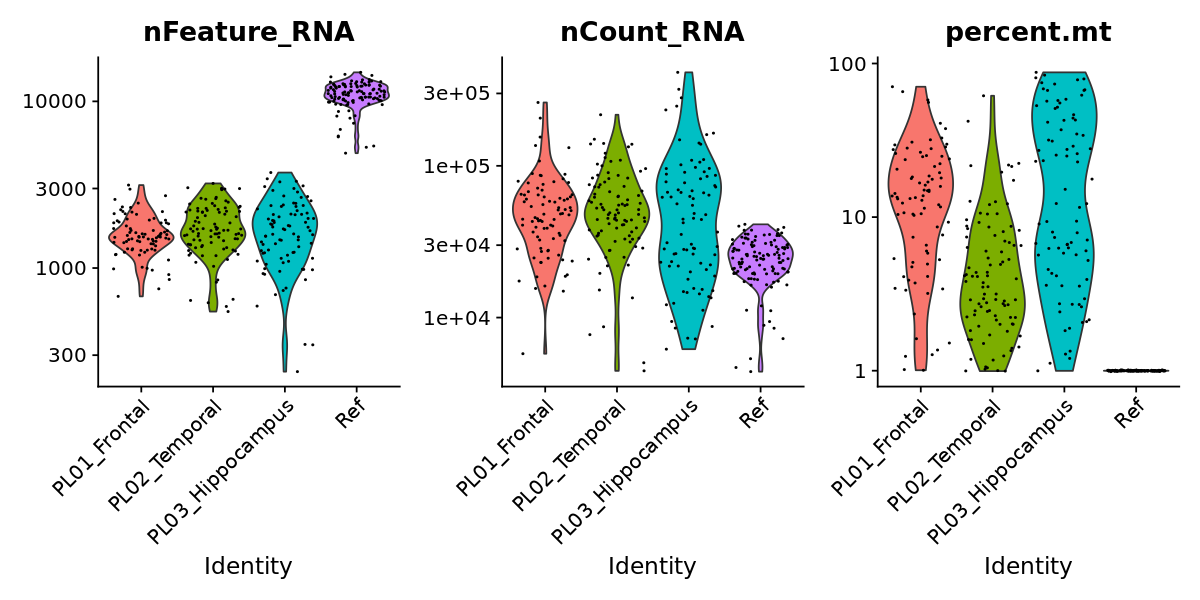

In [27]:
options(repr.plot.width=10, repr.plot.height=5)
VlnPlot(df0,
        log = T, 
        features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), 
        group.by = "Region", 
        pt.size=0.2,
        ncol = 3)

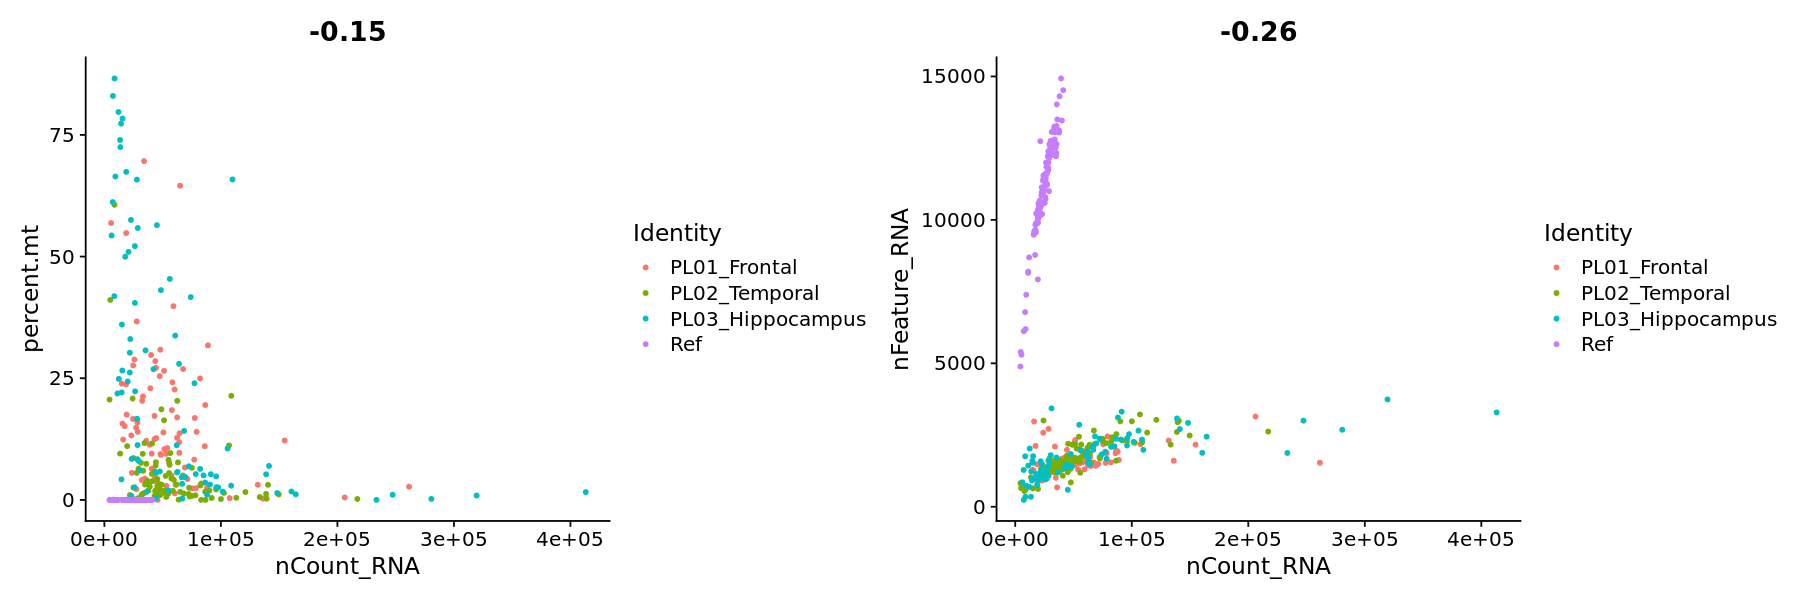

In [28]:
options(repr.plot.width=15, repr.plot.height=5)
plot1 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [29]:
protein_coding <- read.csv("/projects/ps-gleesonlab7/gleeson3/user/zhen/data/snARseq/HEK/2019-12-25_GRCh38-95_auto_protein_coding_genes.csv",
                           header = T, row.names = 1)

In [30]:
df0 <- df0[protein_coding$gene_name,]

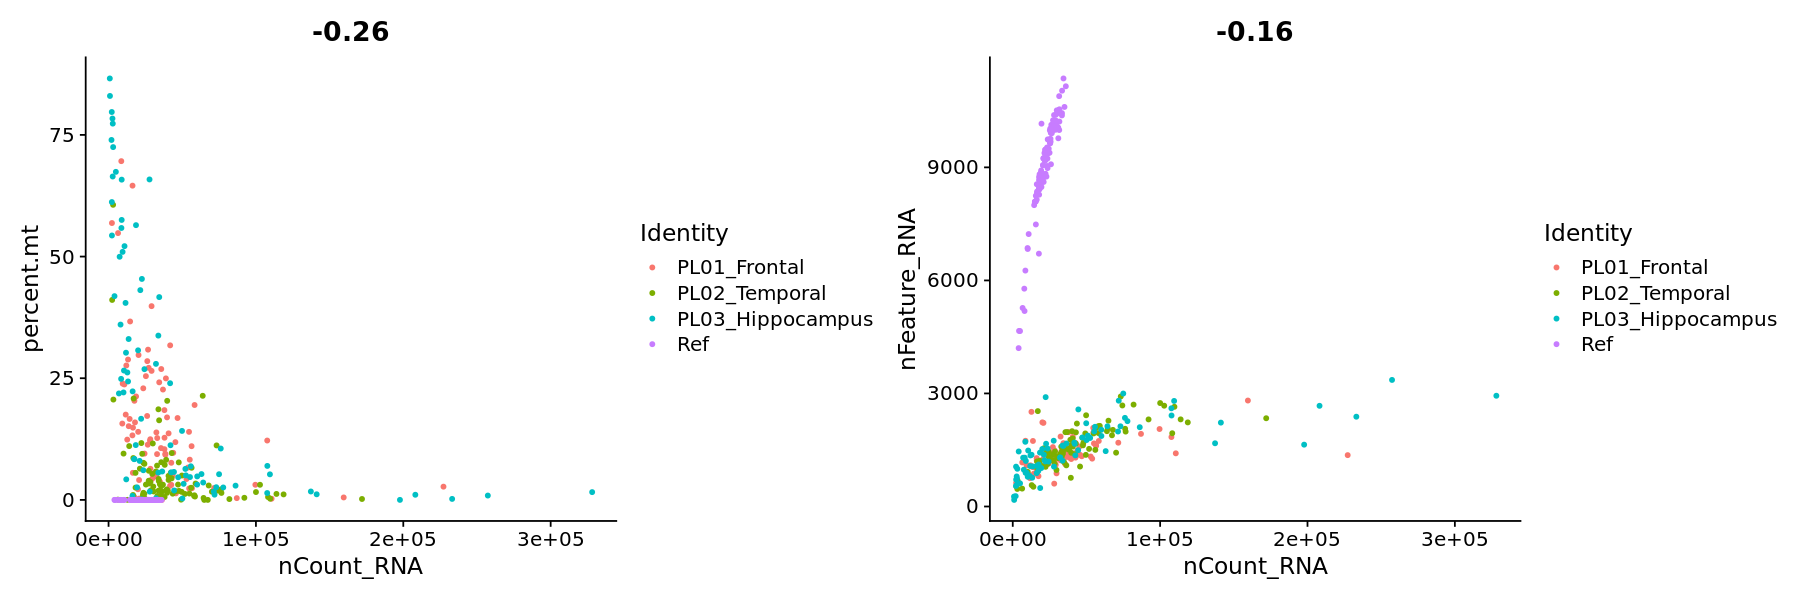

In [31]:
options(repr.plot.width=15, repr.plot.height=5)
plot1 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(df0, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [32]:
#write.csv(df0@meta.data[df0@meta.data$experiment=="bioskryb",],"bioskryb_comparison_unfiltered.csv")

In [33]:
saveRDS(df0,"Bioskryb_snRNAseq_with_ref.rds")

In [34]:
df0<-readRDS("Bioskryb_snRNAseq_with_ref.rds")

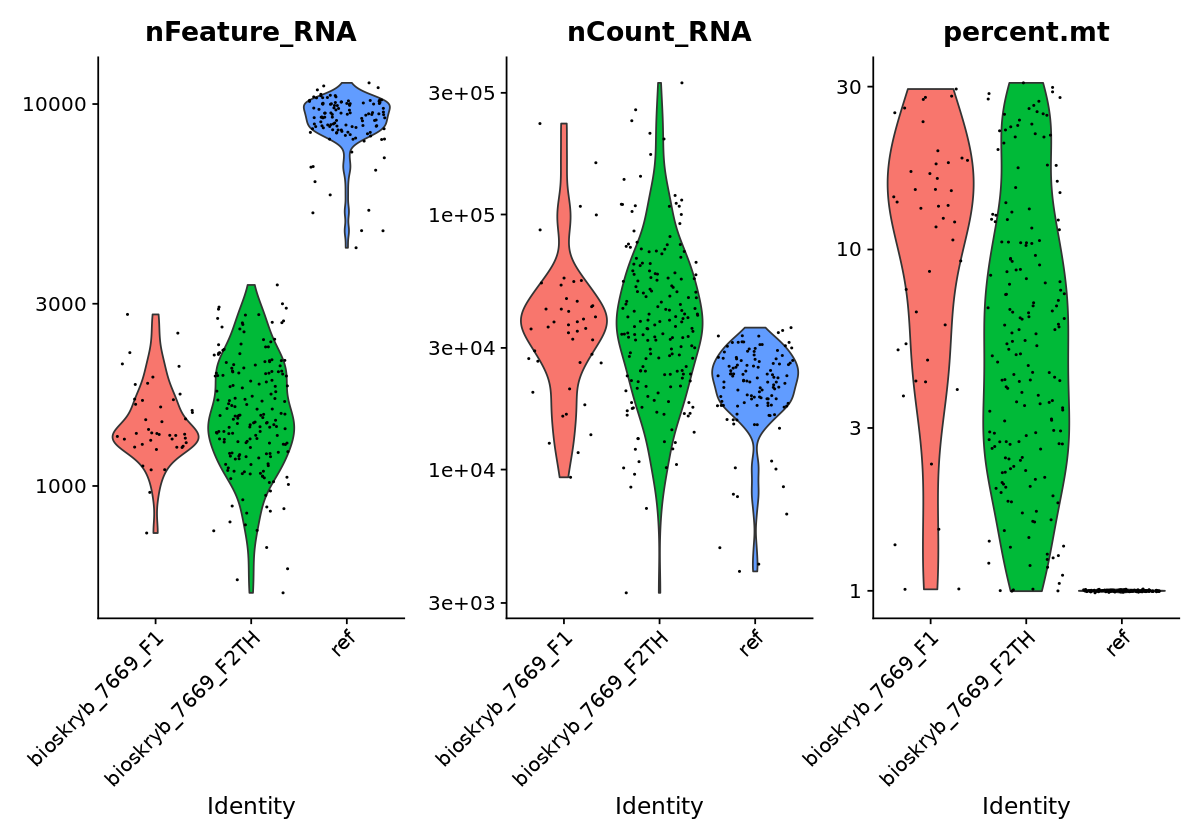

In [35]:
df0 <- subset(df0, subset = nFeature_RNA > 500 & nCount_RNA>1000 & percent.mt<30)
options(repr.plot.width=10, repr.plot.height=7)
VlnPlot(df0, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), group.by = "orig.ident", ncol = 3, pt.size = 0.2,log = T)

In [36]:
merge<-df0

In [37]:
df0 <- SCTransform(object = df0, vars.to.regress = c("percent.mt","nCount_RNA","nFeature_RNA") , verbose = FALSE)

In [38]:
hvg <- VariableFeatures(df0)

In [39]:
top10 <- head(VariableFeatures(df0), 10)

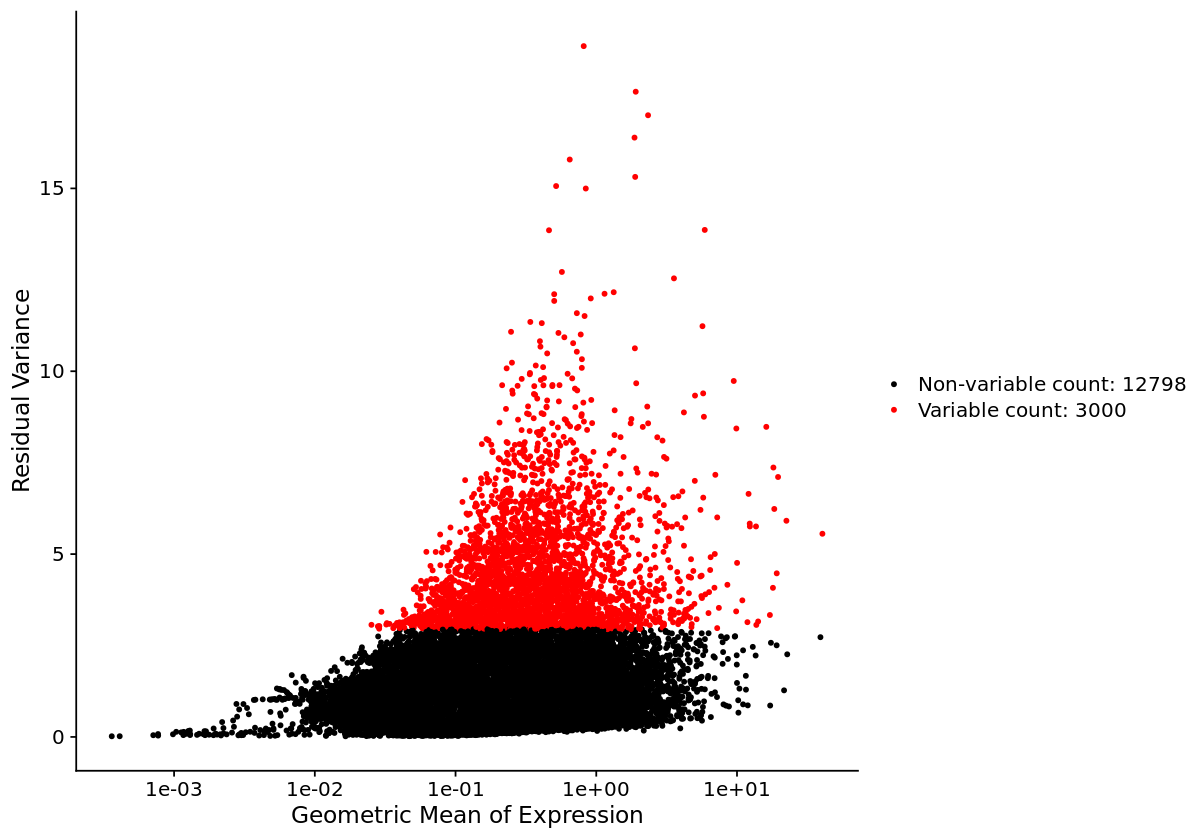

In [40]:
plot1 <- VariableFeaturePlot(df0)
plot1

In [41]:
df0 <- RunPCA(df0, npcs = 100, ndims.print = 1:5, nfeatures.print = 10)

PC_ 1 
Positive:  PTGDS, SLC1A3, NCKAP5, QKI, DOCK5, TMEM144, ZCCHC24, PHLDB1, GSN, FBXL7 
Negative:  FBXW7, FOXH1, NRGN, KIFC2, SLITRK5, NSD3, NPTX1, GRIN1, DOC2A, AHI1 
PC_ 2 
Positive:  CXCL14, SLC6A1, KIT, GAD2, ADARB2, GRIK1, PROX1, ERBB4, IGF1, DLX1 
Negative:  NRGN, ARAP2, NPTX1, RAPGEF5, FBXW7, TESPA1, CADPS2, SLC38A11, SEC14L5, SYNJ2 
PC_ 3 
Positive:  SLC6A1, SLC1A3, ADGRV1, CST3, PTGDS, ATP1A2, BCAN, ZMAT1, SLC1A2, ECPAS 
Negative:  NKTR, CCDC88A, PCLO, CCAR1, EIF5B, ZC3H13, ERBIN, TAF1D, AHI1, ERC2 
PC_ 4 
Positive:  PLEKHH1, SHTN1, PLP1, TMEM165, PIGH, CDK18, LAMP2, MOBP, MIGA1, CLDND1 
Negative:  CST3, ATP1A2, SLC1A2, SPARCL1, FGFR3, HIF3A, ITPR2, GJA1, PTPRZ1, AGT 
PC_ 5 
Positive:  VARS2, FMNL3, GGCX, ELK4, RFNG, PLEKHG5, TMEM259, LENG8, CFAP298, TRMT9B 
Negative:  AHI1, MEIS2, RBBP6, DOP1A, ZNF638, ANKRD12, NKTR, ANKRD26, TTC14, ZC3H13 



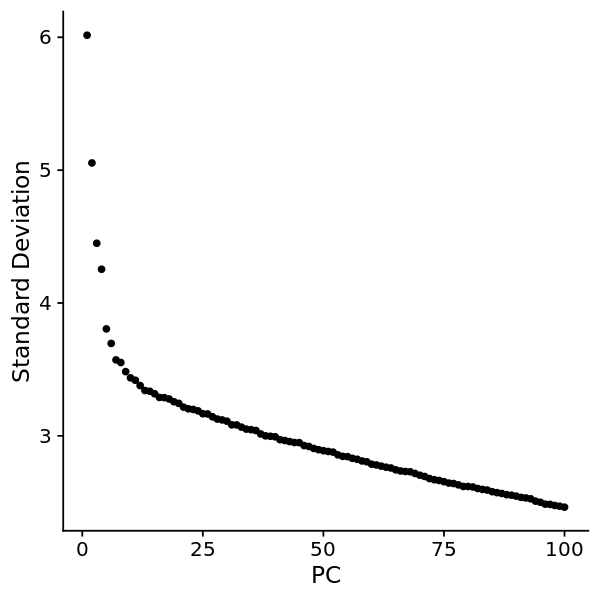

In [42]:
options(repr.plot.width=5, repr.plot.height=5)
ElbowPlot(df0, ndims = 100)

In [43]:
plan(strategy = "multicore")
df0 <- RunUMAP(df0,
               n.neighbors = 50,
               min.dist = 0.1,
               metric = 'cosine',
               n.components = 2, 
               dims = 1:4, 
               n.epochs = 100,
               verbose = F)
#df1 <- RunUMAP(df1, min.dist = 0.1, dims = c(1:20), n.components = 2, verbose = F)
plan(strategy = "sequential")

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


In [44]:
#df0 <- FindNeighbors(object = df0, k.param = 20, reduction = 'umap', dims = 1:2, verbose = F)
df0 <- FindNeighbors(df0, reduction = 'pca', dims =c(1:4), verbose = F)

In [45]:
df0 <- FindClusters(object = df0, resolution = 0.5)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 346
Number of edges: 9042

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8118
Number of communities: 5
Elapsed time: 0 seconds


In [46]:
df0

An object of class Seurat 
35085 features across 346 samples within 2 assays 
Active assay: SCT (15798 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

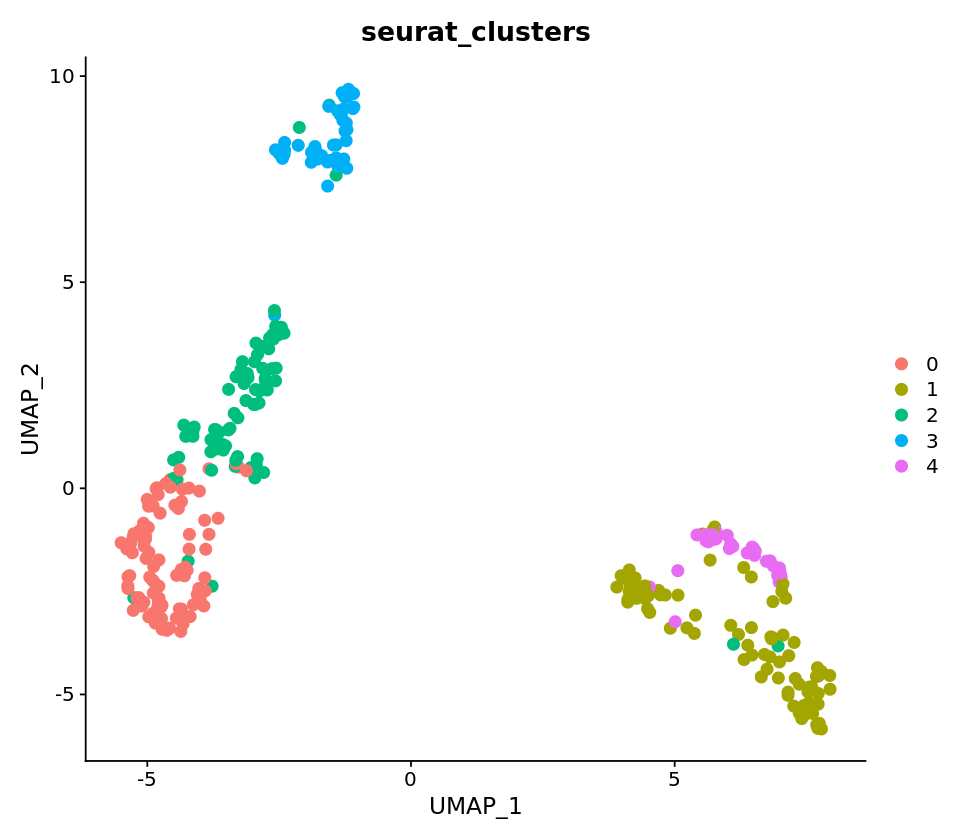

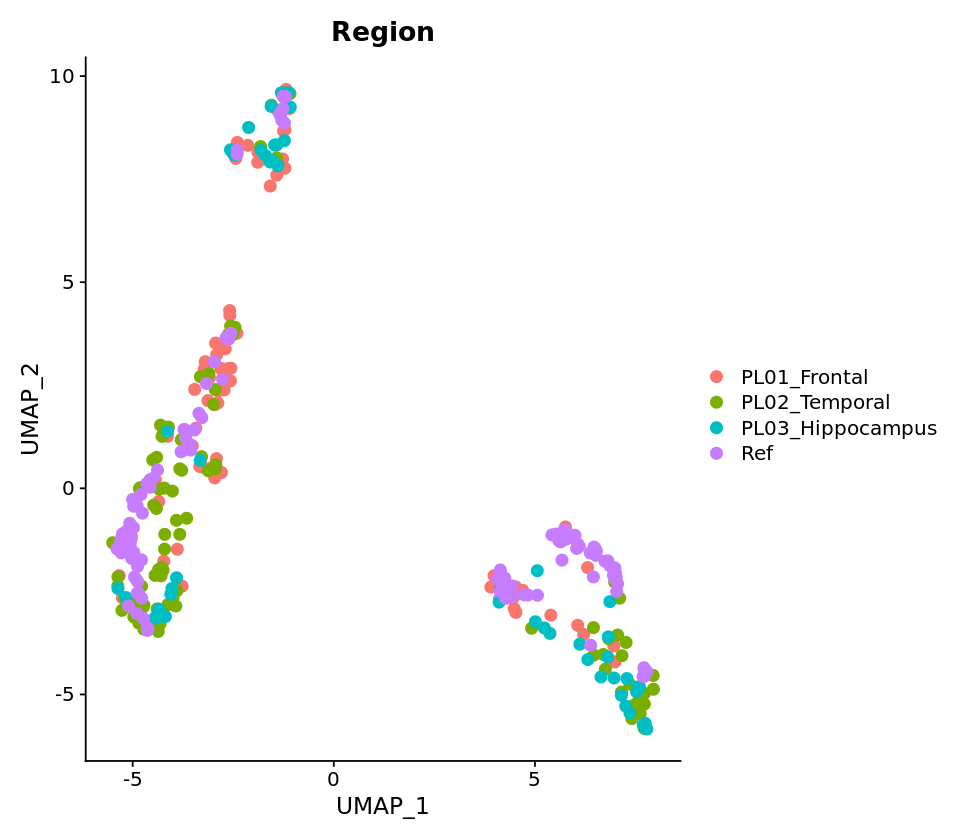

In [47]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('seurat_clusters'),label = F)
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('Region'),label = F)

In [48]:
pdf(file="./UMAP_Region.pdf",width=10,height=8)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('Region'),label = F)
dev.off()
pdf(file="./UMAP_cluster.pdf",width=9,height=8)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('seurat_clusters'),label = F)
dev.off()

png 
  2

png 
  2

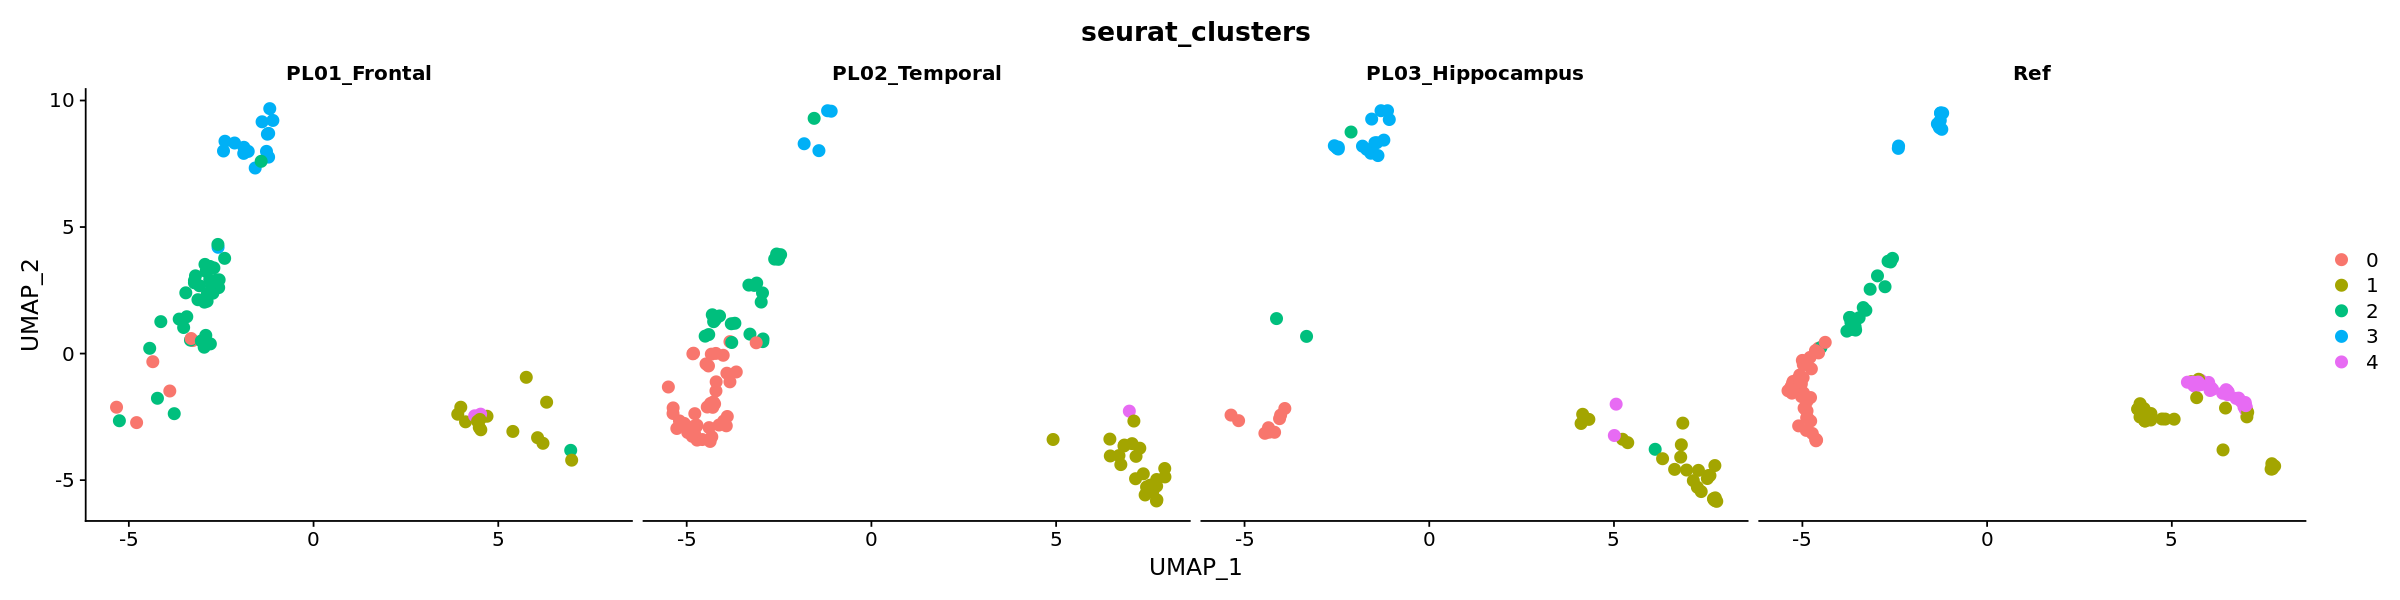

In [49]:
options(repr.plot.width=20, repr.plot.height=5)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('seurat_clusters'), split.by=c("Region"),label = F)

[[1]]


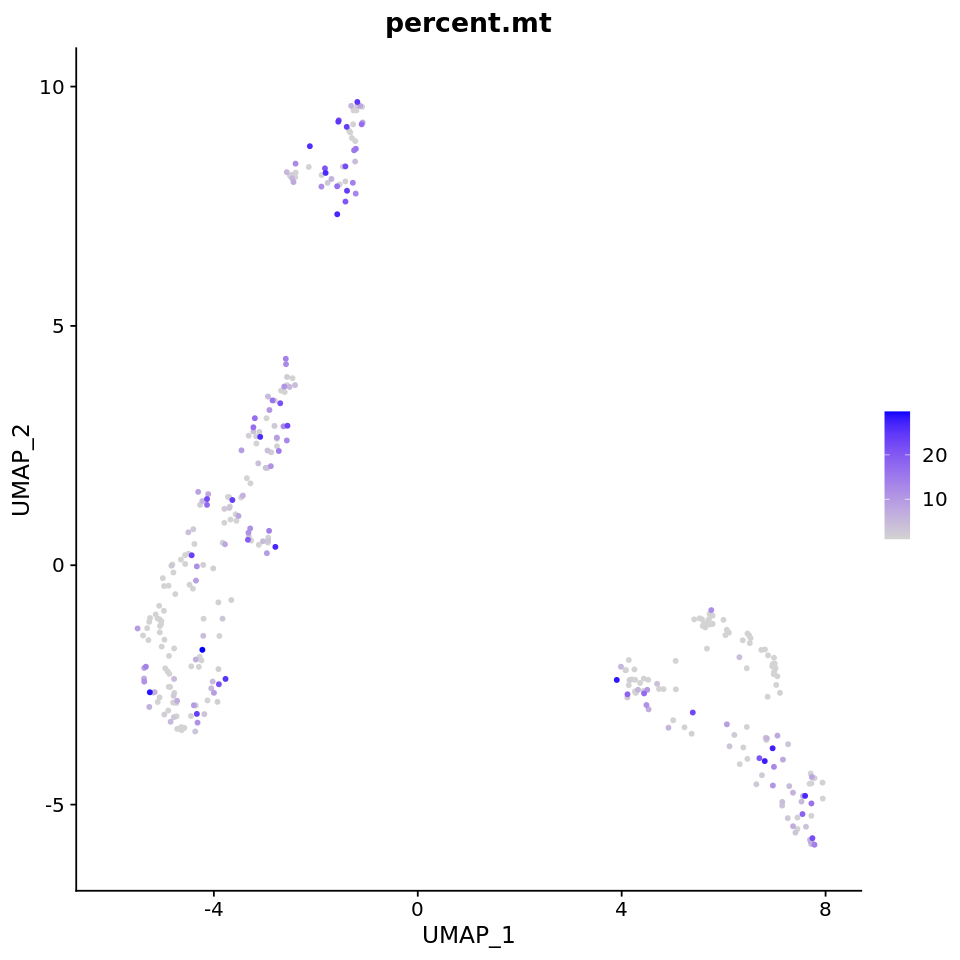

In [50]:
options(repr.plot.width=8, repr.plot.height=8)

FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 1,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15',
                    # max.cutoff = 'q99',
                    order = T,
                    features = c('percent.mt'))

In [51]:
rm(plist)
plist <- FeaturePlot(df0,
                     slot = 'data',
                     pt.size = 1,
                     reduction = "umap",
                     combine = F,
                     min.cutoff = 'q15',
                    # max.cutoff = 'q99',
                    order = T,
                    features = c('SYT1','RBFOX3','CAMK2A','CUX2','SATB2','RORB','TLE4',
                                 'GAD1','GAD2','GRIK1','ERBB4','NR2F2','VIP',
                                 'GFAP','SLC1A2','SLC1A3','MMD2',
                                 'OLIG2','MOBP','PLP1','PDGFRA',
                                 'SPI1'
                       ))

Warning message in rm(plist):
“object 'plist' not found”


In [52]:
for(i in 1:length(plist)){
    plist[[i]] <- plist[[i]] +
                scale_color_gradientn(colours = c('grey90',RColorBrewer::brewer.pal(n = 9,name = 'YlOrRd'))) +
                NoLegend() + 
                NoAxes()
}

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

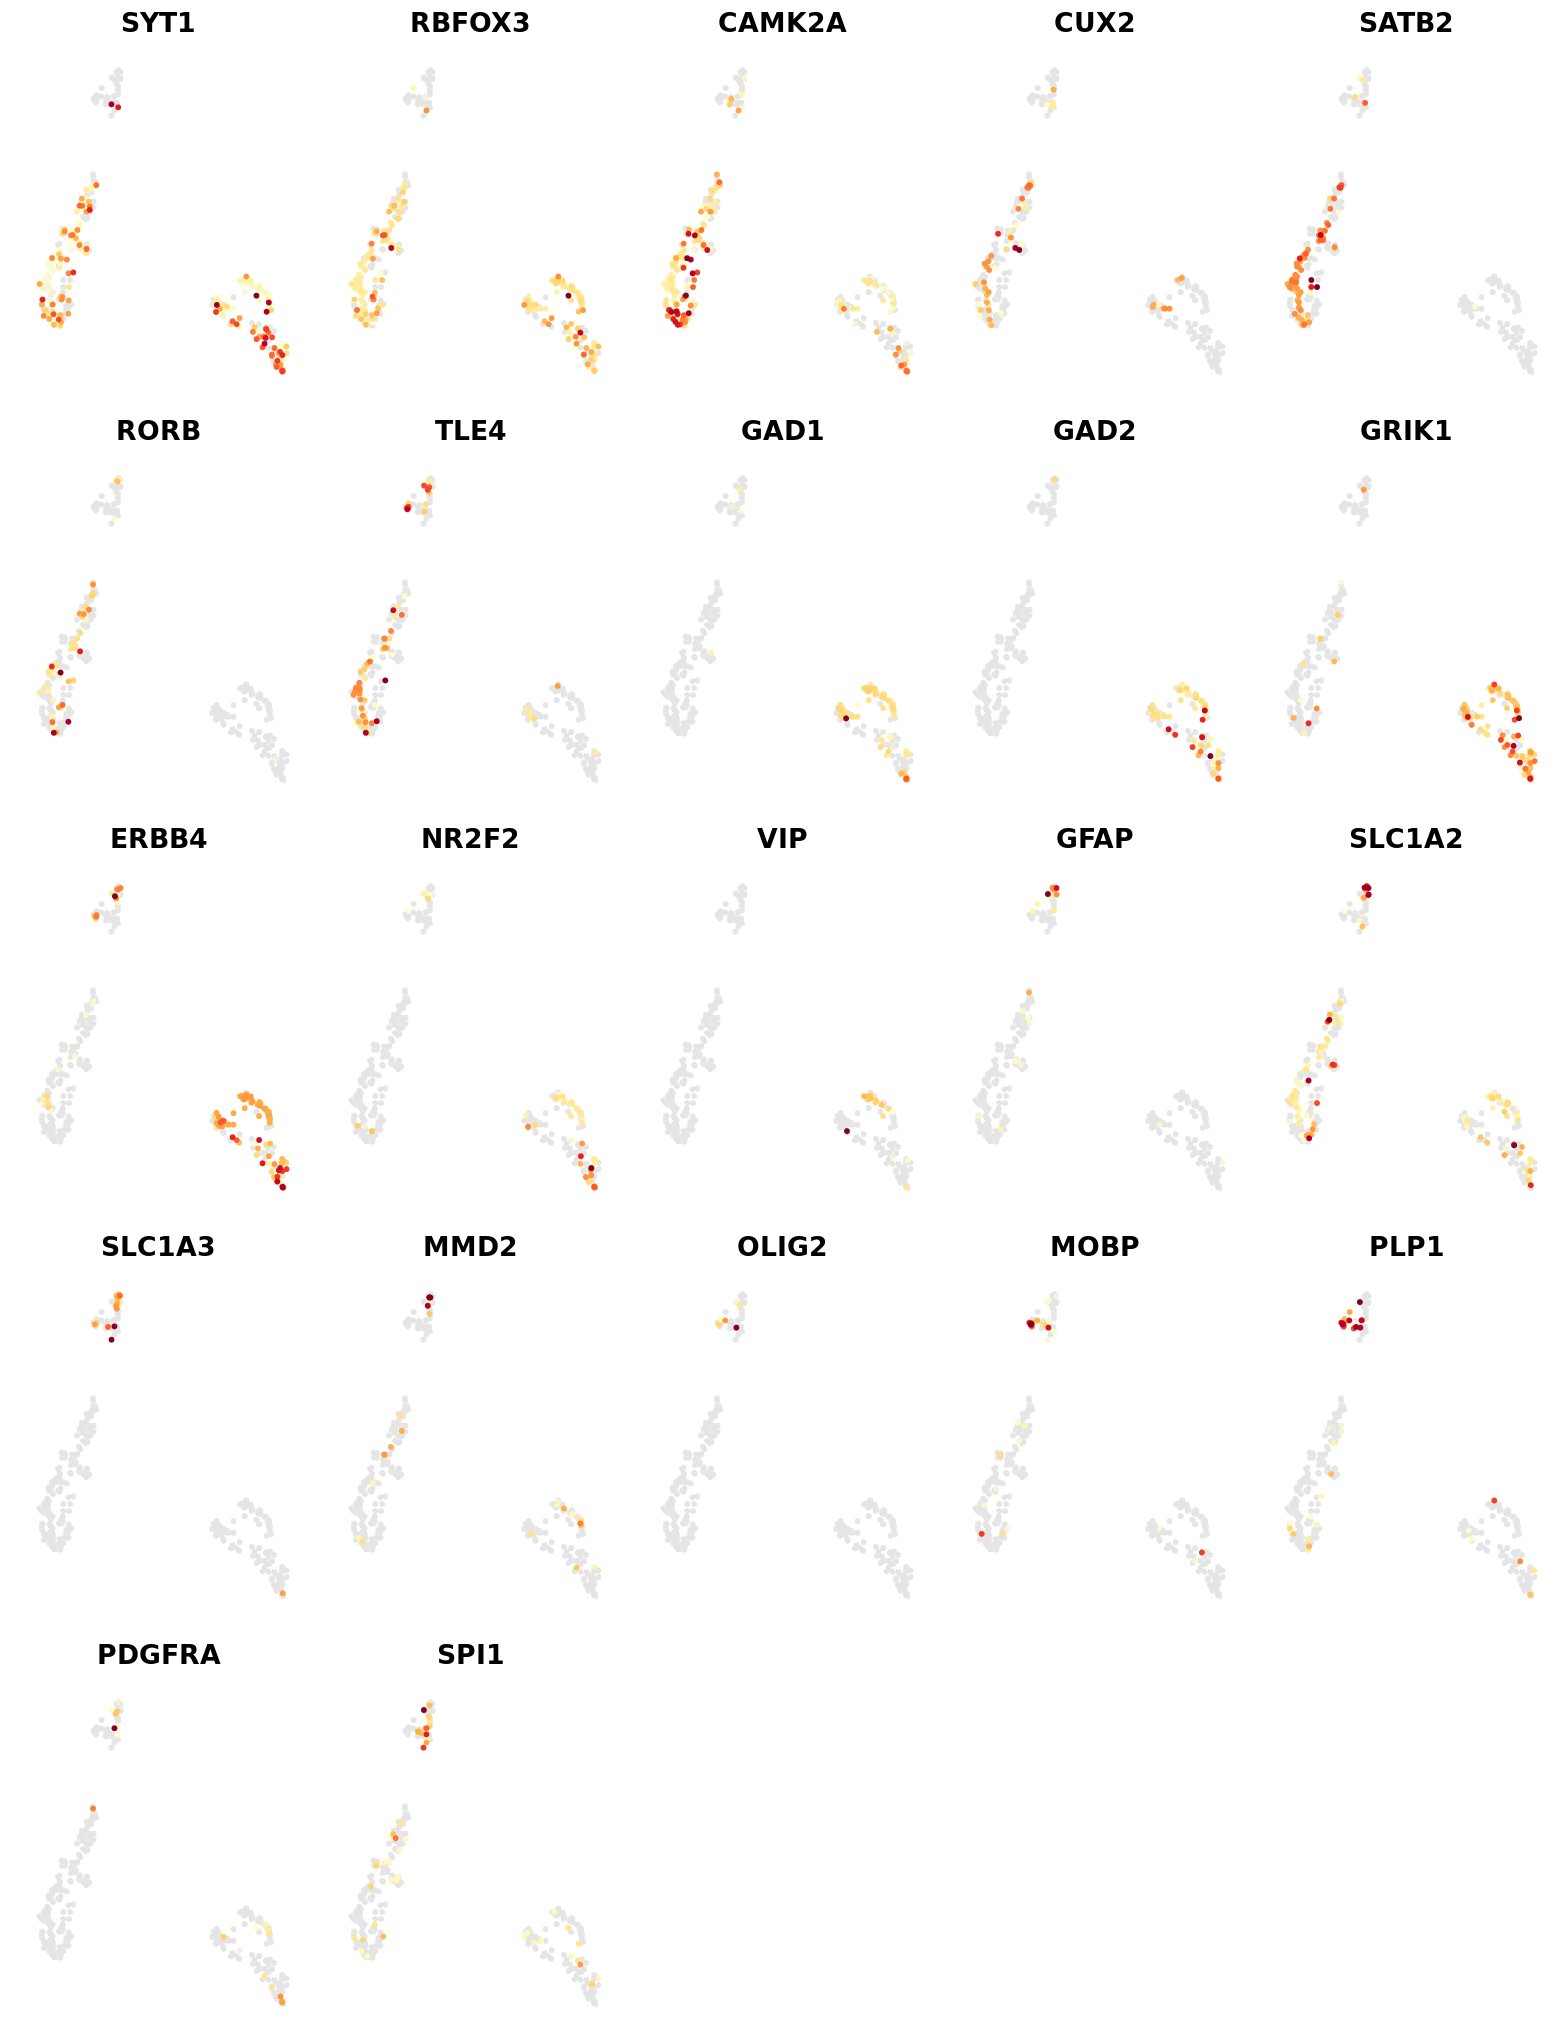

In [53]:
options(repr.plot.width=13, repr.plot.height=17)
do.call(gridExtra::grid.arrange, plist)

In [54]:
df0.markers <- FindAllMarkers(df0, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster 0

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



In [55]:
df0.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
3.394340e-24,0.9194696,0.789,0.195,5.362378e-20,0,SLC17A7
1.434436e-23,0.9686392,0.863,0.247,2.266121e-19,0,NRGN
2.176621e-22,0.8742531,0.589,0.100,3.438626e-18,0,KCNA1
5.020378e-22,0.9100199,0.505,0.064,7.931192e-18,0,TESPA1
1.360964e-20,0.9040738,0.611,0.127,2.150051e-16,0,MLIP
3.939182e-20,0.8901427,0.747,0.203,6.223120e-16,0,NPTX1
2.024382e-19,0.8841325,0.611,0.159,3.198119e-15,0,PTK2B
8.640425e-18,0.8381778,0.547,0.124,1.365014e-13,0,ANO3
2.289734e-17,0.8616640,0.600,0.147,3.617322e-13,0,SV2B


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


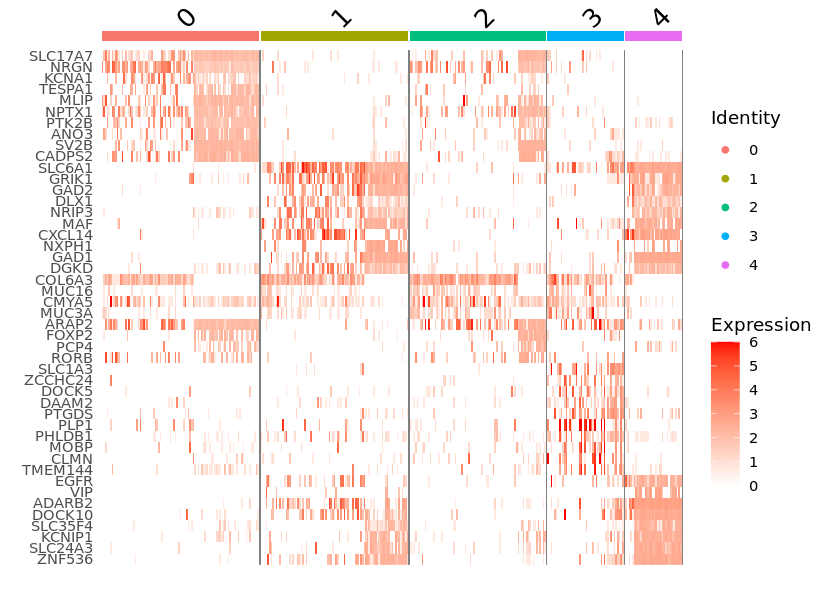

In [56]:
top10 <- df0.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
options(repr.plot.width=7, repr.plot.height=5)
DoHeatmap(df0, slot = "data", features = top10$gene) + scale_fill_gradientn(colors = c("white", "red"))

In [57]:
pdf(file="./DEG_heatmap.pdf",width=8,height=5)
DoHeatmap(df0, slot = "data", features = top10$gene) + scale_fill_gradientn(colors = c("white", "red"))
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


png 
  2

In [58]:
saveRDS(df0, "./Bioskryb_snRNAseq_with_ref.rds")

# Cell type assignment

In [59]:
df0@meta.data$Cell_Type[df0@meta.data$seurat_clusters %in% c(0,2)]<-"ExN"
df0@meta.data$Cell_Type[df0@meta.data$seurat_clusters %in% c(1,4)]<-"InN"
df0@meta.data$Cell_Type[df0@meta.data$seurat_clusters %in% c(3)]<-"Other"

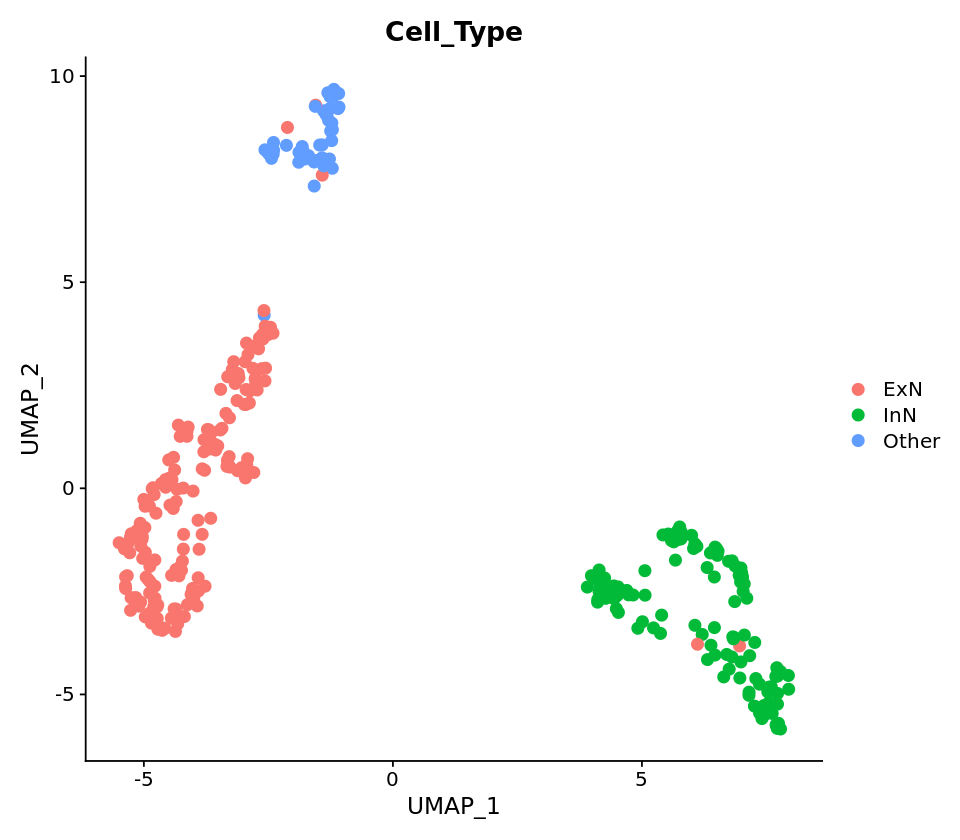

In [60]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('Cell_Type'),label = F)

In [61]:
pdf(file="./UMAP_Cell_Type.pdf",width=8,height=7)
DimPlot(df0,reduction = 'umap',pt.size=3, group.by =c('Cell_Type'),label = F)
dev.off()

png 
  2

In [62]:
Idents(df0)<-"Cell_Type"

In [63]:
df0.markers <- FindAllMarkers(df0, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)

Calculating cluster ExN

Calculating cluster Other

Calculating cluster InN



In [64]:
df0.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
2.597572e-32,1.2644680,0.718,0.101,4.103645e-28,ExN,NRGN
1.476873e-29,1.1684077,0.633,0.059,2.333163e-25,ExN,NPTX1
4.116849e-26,0.9972783,0.616,0.089,6.503798e-22,ExN,SLC17A7
2.861055e-22,0.9522840,0.672,0.172,4.519894e-18,ExN,ENC1
6.501468e-20,0.8842244,0.701,0.284,1.027102e-15,ExN,SYT7
2.066079e-19,0.9181759,0.463,0.047,3.263991e-15,ExN,MLIP
7.713698e-19,0.8849658,0.492,0.077,1.218610e-14,ExN,SATB2
3.528187e-18,0.8853497,0.672,0.266,5.573830e-14,ExN,LMO4
6.055273e-18,0.8855593,0.463,0.071,9.566121e-14,ExN,SV2B


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


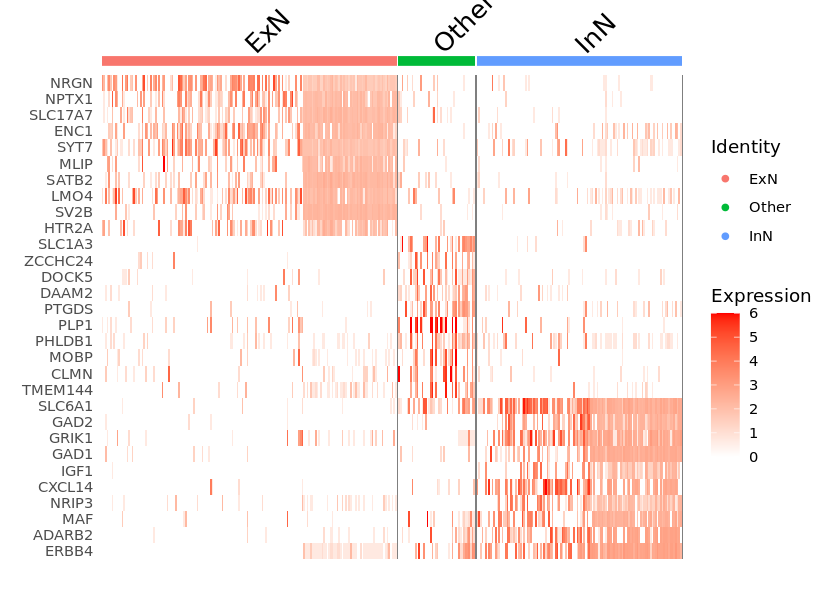

In [65]:
top10 <- df0.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)
options(repr.plot.width=7, repr.plot.height=5)
DoHeatmap(df0, slot = "data", features = top10$gene) + scale_fill_gradientn(colors = c("white", "red"))

In [66]:
pdf(file="./DEG_heatmap_Celltype_defined.pdf",width=8,height=5)
DoHeatmap(df0, slot = "data", features = top10$gene) + scale_fill_gradientn(colors = c("white", "red"))
dev.off()

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


png 
  2

In [67]:
saveRDS(df0, "./Bioskryb_snRNAseq_with_ref.rds")

# Asterisk marked InN cell type identity

In [6]:
df0<-readRDS("./Bioskryb_snRNAseq_with_ref.rds")

In [7]:
metadata<-read.table("./Bioskryb_RNA_cell_type_info_with_ref.txt",header=TRUE)

In [8]:
df0@meta.data$Marked_InN<-as.factor(metadata$Marked_InN)

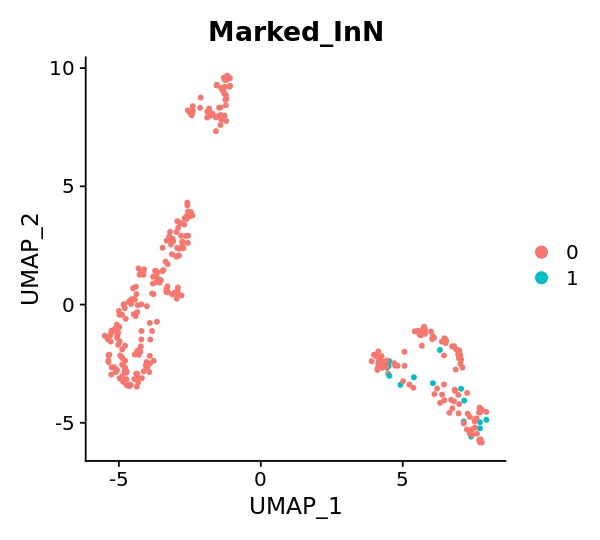

In [9]:
options(repr.plot.width=5, repr.plot.height=4.5)
DimPlot(df0,reduction = 'umap',pt.size=1, group.by =c('Marked_InN'),label = F)

In [10]:
pdf(file="./Marked_InN_UMAP.pdf",width=5,height=4.5)
DimPlot(df0,reduction = 'umap',pt.size=1, group.by =c('Marked_InN'),label = F)
dev.off()

png 
  2

In [11]:
unique(df0@meta.data$Region)

[1] "PL01_Frontal"     "PL02_Temporal"    "PL03_Hippocampus" "Ref"

In [12]:
Idents(df0)<-"Cell_Type"
df1<-subset(df0, idents = "InN")
Idents(df1)<-"Region"
df1<-subset(df1, idents = c("PL01_Frontal","PL02_Temporal"))

# Subsetting for interneuron details

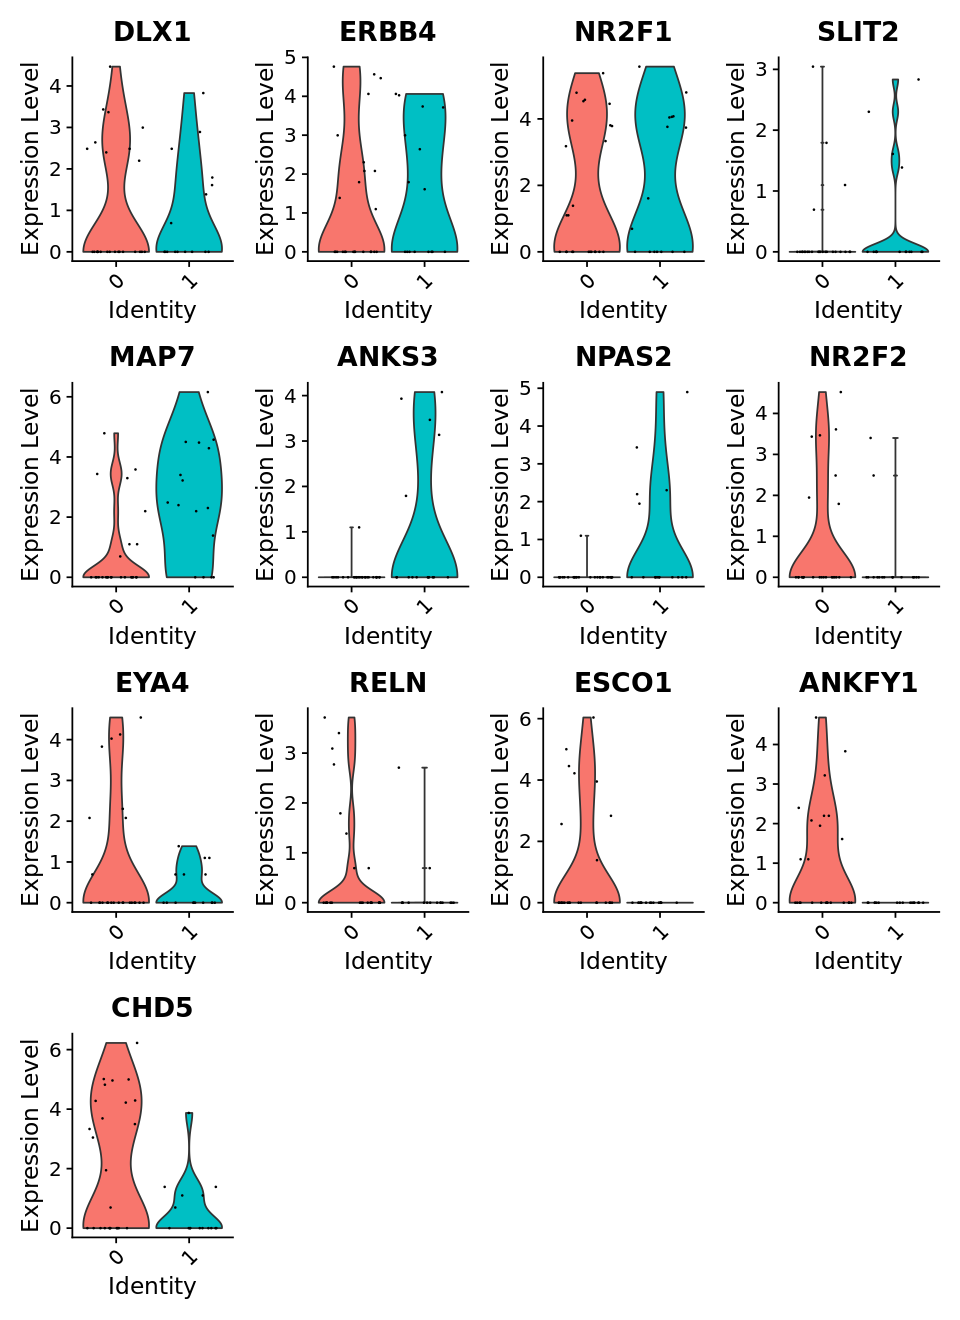

In [13]:
Idents(df1)<-"Marked_InN"
options(repr.plot.width=8, repr.plot.height=11)
VlnPlot(df1, features = c("DLX1","ERBB4","NR2F1","SLIT2","MAP7","ANKS3","NPAS2","NR2F2","EYA4","RELN","ESCO1","ANKFY1","CHD5"))

In [14]:
pdf(file="./Marked_InN_Marker_expression_violinplot.pdf",width=8,height=11)
VlnPlot(df1, features = c("DLX1","ERBB4","NR2F1","SLIT2","MAP7","ANKS3","NPAS2","NR2F2","EYA4","RELN","ESCO1","ANKFY1","CHD5"))
dev.off()

png 
  2

In [15]:
DE<-FindMarkers(df1, ident.1 = 1, ident.2 = 0,  min.pct = 0, test.use = "t")

Warning message:
“The following arguments are not used: norm.method”


In [17]:
df1

An object of class Seurat 
35085 features across 41 samples within 2 assays 
Active assay: SCT (15798 features, 3000 variable features)
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

In [16]:
write.csv(DE,"Asterisk_Marked_InN_DEG.csv")